## Alassane Diallo

# <font color='orange'>  Hidden Markov Model for Detecting Regime Change in Trading  </font>  

The aim of this paper is to show an application of the Hidden Markov Model in the Gold Regime detection. The document is based on a recent research paper on regime change detection namely "A Hybrid Learning Approach to Detecting Regime Switches in Financial Markets". 

This paper aims to explore the application of the Hidden Markov Model (HMM) for detecting regime changes in the gold market. The analysis draws on findings from the research paper "A Hybrid Learning Approach to Detecting Regime Switches in Financial Markets."


## <font color='orange'>Regime change</font>  
Regime change simply means a change in market conditions whether it'd be "bull market to bear market" ( or conversely) or "high to low volatility" etc ...  understanding and modelling the regime can be useful for making optimal trading decisions. 

A regime change refers to a significant shift in market conditions, such as a transition from a bull market to a bear market, or from periods of high volatility to low volatility, among others. Accurately understanding and modelling these shifts is crucial for making informed and optimal trading decisions. In the literature, several models have been developed to detect regime changes, one of the most notable being the Gaussian Hidden Markov Model, which classifies different regimes within a dataset into hidden states representing the different regimes. The next section goes in-depth into the algorithm behind the Gaussian Hidden Markov Model. 


## <font color='orange'> Mathematical Structure of the Hidden Markov Model </font>   

We now present a mathematical framework for classifying market regimes using a Gaussian Hidden Markov Model (HMM). The model consists of hidden states representing different market regimes (e.g., bull, bear, or sideways), with market observations being modeled as Gaussian distributions.
1. Hidden States $Z_t$

Let $Z_t$ denote the hidden state at time $t$, which represents the market regime at time $t$. We assume there are $n$ possible hidden states corresponding to different market regimes, i.e.,

$$
Z_t \in\{1,2, \ldots, n\}
$$

where each $Z_t$ corresponds to a market regime (e.g., bull, bear, neutral).


2. Observations $X_t$

At each time $t$, we observe data $X_t$ that is generated by the hidden state $Z_t$. Let $X_t$ represent the market return, price, or other market variables such as volatility or momentum. The distribution of the observed data $X_t$ depends on the hidden state $Z_t$. Given $Z_t=k$, the observation $X_t$ is assumed to follow a Gaussian distribution with mean $\mu_k$ and covariance $\Sigma_k$ :

$$
P\left(X_t \mid Z_t=k\right)=\mathcal{N}\left(X_t \mid \mu_k, \Sigma_k\right)
$$

where:
- $\mu_k$ is the mean return for regime $k$,
- $\Sigma_k$ is the covariance (or variance if 1 D ) of the observations in state $k$.
3. Transition Probabilities $A$

The transition probabilities describe the likelihood of transitioning between hidden states from one time step to the next. The transition probability matrix $A=\left[A_{i j}\right]$ is an $n \times n$ matrix, where $A_{i j}$ represents the probability of transitioning from state $i$ to state $j$ :

$$
A_{i j}=P\left(Z_{t+1}=j \mid Z_t=i\right)
$$


The matrix $A$ must satisfy the following condition:

$$
\sum_{j=1}^n A_{i j}=1 \quad \text { for all } \quad i \in\{1,2, \ldots, n\}
$$

4. Initial State Probabilities $\pi$

The initial state probability vector $\pi=\left[\pi_1, \pi_2, \ldots, \pi_n\right]$ represents the probability of starting in each state. It is a probability distribution, so:

$$
\sum_{i=1}^n \pi_i=1
$$

where $\pi_i=P\left(Z_0=i\right)$.



5. Training the HMM: Baum-Welch Algorithm

To estimate the parameters of the model (transition probabilities, emission parameters, and initial state probabilities), we use the Baum-Welch algorithm, which is a special case of the Expectation-Maximization (EM) algorithm.
- E-Step: Compute the expected values of the hidden states $Z_t$ given the observations $X_1, X_2, \ldots, X_T$, and the current estimates of the model parameters.

We compute the forward and backward probabilities:
- Forward variable $\alpha_t(i)=P\left(X_1, X_2, \ldots, X_t, Z_t=i \mid \theta\right)$
- Backward variable $\beta_t(i)=P\left(X_{t+1}, X_{t+2}, \ldots, X_T \mid Z_t=i, \theta\right)$
- M-Step: Update the parameters $\mu_k, \Sigma_k, A_{i j}$, and $\pi_i$ using the expected values computed in the E-step:
- Update the transition matrix $A$ using the expected transitions between states:

$$
A_{i j}=\frac{\sum_{t=1}^{T-1} \gamma_t(i, j)}{\sum_{t=1}^{T-1} \gamma_t(i)}
$$

where $\gamma_t(i, j)$ is the probability of transitioning from state $i$ to state $j$ at time $t$.
- Update the emission parameters $\mu_k$ and $\Sigma_k$ using the expected observations given the hidden states:

$$
\mu_k=\frac{\sum_{t=1}^T \gamma_t(k) X_t}{\sum_{t=1}^T \gamma_t(k)}, \quad \Sigma_k=\frac{\sum_{t=1}^T \gamma_t(k)\left(X_t-\mu_k\right)\left(X_t-\mu_k\right)^T}{\sum_{t=1}^T \gamma_t(k)}
$$

- Update the initial state probabilities $\pi$ using:

$$
\pi_i=\gamma_1(i)
$$

where $\gamma_1(i)$ is the probability of starting in state $i$.
These steps are iteratively applied until the model parameters converge.


6. Classifying Market Regimes: Viterbi Algorithm

Once the model parameters are trained, we use the Viterbi algorithm to classify the most likely sequence of hidden states $Z_1, Z_2, \ldots, Z_T$ given the observed data $X_1, X_2, \ldots, X_T$.

The Viterbi algorithm finds the most probable sequence of hidden states by maximizing the joint probability:

$$
\hat{Z}_1, \hat{Z}_2, \ldots, \hat{Z}_T=\arg \max _{Z_1, Z_2, \ldots, Z_T} P\left(Z_1, Z_2, \ldots, Z_T \mid X_1, X_2, \ldots, X_T\right)
$$


This can be done recursively using dynamic programming. The probability of the most likely state sequence up to time $t$ for each state $i$ is:

$$
\delta_t(i)=\max _{Z_1, Z_2, \ldots, Z_{t-1}} P\left(Z_1, Z_2, \ldots, Z_t=i \mid X_1, X_2, \ldots, X_t\right)
$$


The Viterbi algorithm efficiently computes this using:

$$
\delta_t(i)=\max _j\left(\delta_{t-1}(j) A_{j i}\right) P\left(X_t \mid Z_t=i\right)
$$


and the corresponding backtracking to recover the sequence of most likely hidden states $Z_1, Z_2, \ldots, Z_T$.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, pacf , acf
from hmmlearn.hmm import GaussianHMM
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats


In [2]:
df = pd.read_csv("XAU_USD Historical Data.csv")

In [3]:
df['Change %'] = df["Change %"].str.replace('%', '').astype(float)

In [4]:
df["Price"] = df["Price"].str.replace(",", "").astype(float)
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df["log-return"]= np.log(df["Price"]).diff()
df

,Date,Price,Open,High,Low,Vol.,Change %,log-return
0,2024-12-20,2620.79,"2,593.97","2,631.92","2,589.56",NaN,1.04,NaN
1,2024-12-19,2593.85,"2,587.87","2,626.73","2,583.49",NaN,0.24,-0.010333
2,2024-12-18,2587.63,"2,645.68","2,652.09","2,586.52",NaN,-2.19,-0.002401
3,2024-12-17,2645.54,"2,652.63","2,659.22","2,633.00",NaN,-0.26,0.022133
4,2024-12-16,2652.50,"2,649.11","2,664.83","2,643.34",NaN,0.16,0.002627
...,...,...,...,...,...,...,...,...
1029,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",NaN,-0.33,0.034167
1030,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",NaN,-1.57,0.003294
1031,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",NaN,0.36,0.015791
1032,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",NaN,2.33,-0.003633


In [6]:
df.drop(columns=["Vol."], inplace=True)
df

,Date,Price,Open,High,Low,Change %,log-return
0,2024-12-20,2620.79,"2,593.97","2,631.92","2,589.56",1.04,NaN
1,2024-12-19,2593.85,"2,587.87","2,626.73","2,583.49",0.24,-0.010333
2,2024-12-18,2587.63,"2,645.68","2,652.09","2,586.52",-2.19,-0.002401
3,2024-12-17,2645.54,"2,652.63","2,659.22","2,633.00",-0.26,0.022133
4,2024-12-16,2652.50,"2,649.11","2,664.83","2,643.34",0.16,0.002627
...,...,...,...,...,...,...,...
1029,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",-0.33,0.034167
1030,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",-1.57,0.003294
1031,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",0.36,0.015791
1032,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",2.33,-0.003633


In [7]:
df = df.sort_values(by="Date")

In [8]:
df

,Date,Price,Open,High,Low,Change %,log-return
1033,2021-01-01,1898.10,"1,897.69","1,899.12","1,897.39",0.09,-0.023009
1032,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",2.33,-0.003633
1031,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",0.36,0.015791
1030,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",-1.57,0.003294
1029,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",-0.33,0.034167
...,...,...,...,...,...,...,...
4,2024-12-16,2652.50,"2,649.11","2,664.83","2,643.34",0.16,0.002627
3,2024-12-17,2645.54,"2,652.63","2,659.22","2,633.00",-0.26,0.022133
2,2024-12-18,2587.63,"2,645.68","2,652.09","2,586.52",-2.19,-0.002401
1,2024-12-19,2593.85,"2,587.87","2,626.73","2,583.49",0.24,-0.010333


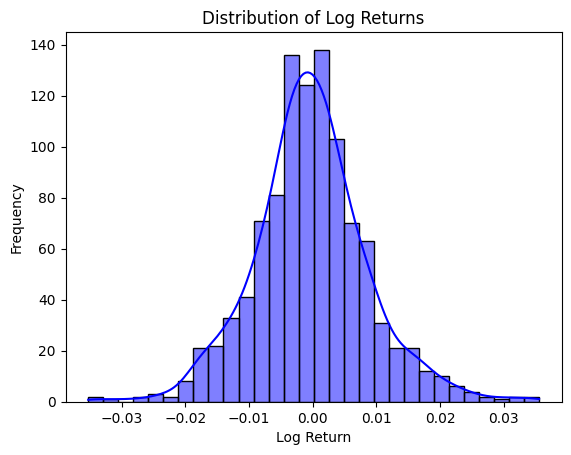

In [9]:
sns.histplot(df['log-return'], kde=True, color='blue', bins=30)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()


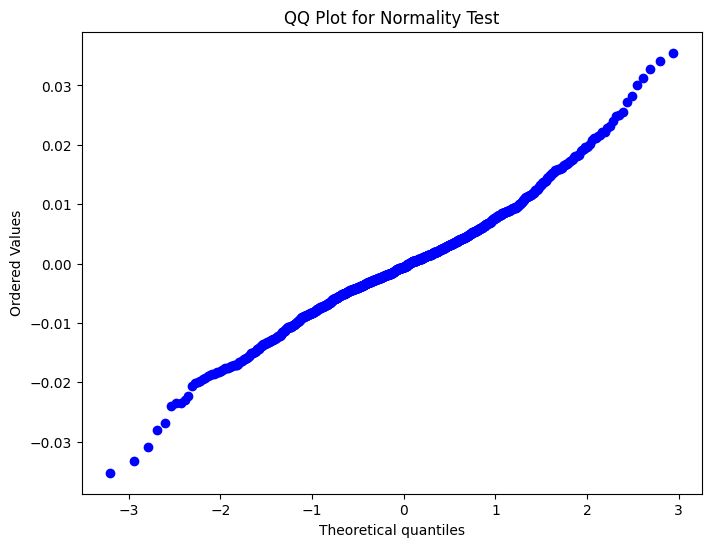

In [10]:
plt.figure(figsize=(8, 6))
stats.probplot(df['log-return'], dist="norm", plot=plt)
plt.title('QQ Plot for Normality Test')
plt.show()

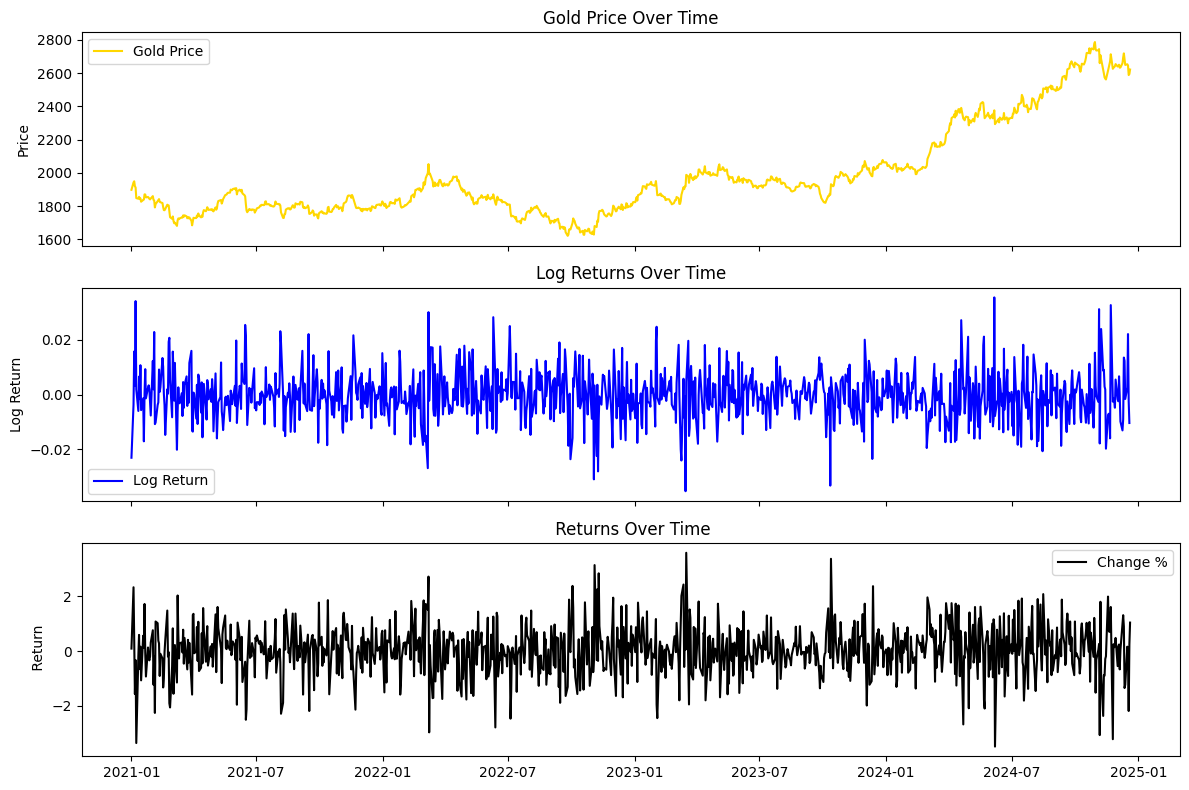

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axes[0].plot(df['Date'], df['Price'], label='Gold Price', color='gold')
axes[0].set_title('Gold Price Over Time')
axes[0].set_ylabel('Price')
axes[0].legend()


axes[1].plot(df['Date'], df['log-return'], label='Log Return', color='blue')
axes[1].set_title('Log Returns Over Time')
axes[1].set_ylabel('Log Return')
axes[1].legend()

axes[2].plot(df['Date'], df['Change %'], label='Change %', color='black')
axes[2].set_title(' Returns Over Time')
axes[2].set_ylabel(' Return')
axes[2].legend()

plt.tight_layout()
plt.show()

In [12]:
result = adfuller(df['Change %'])
print("result:", result)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:", result[4])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


result: (-15.469077255839718, 2.644388850016086e-28, 3, 1030, {'1%': -3.436714730058834, '5%': -2.8643501440982058, '10%': -2.5682662399849185}, 2622.497851619522)
ADF Statistic: -15.469077255839718
p-value: 2.644388850016086e-28
Critical Values: {'1%': -3.436714730058834, '5%': -2.8643501440982058, '10%': -2.5682662399849185}
The time series is stationary.


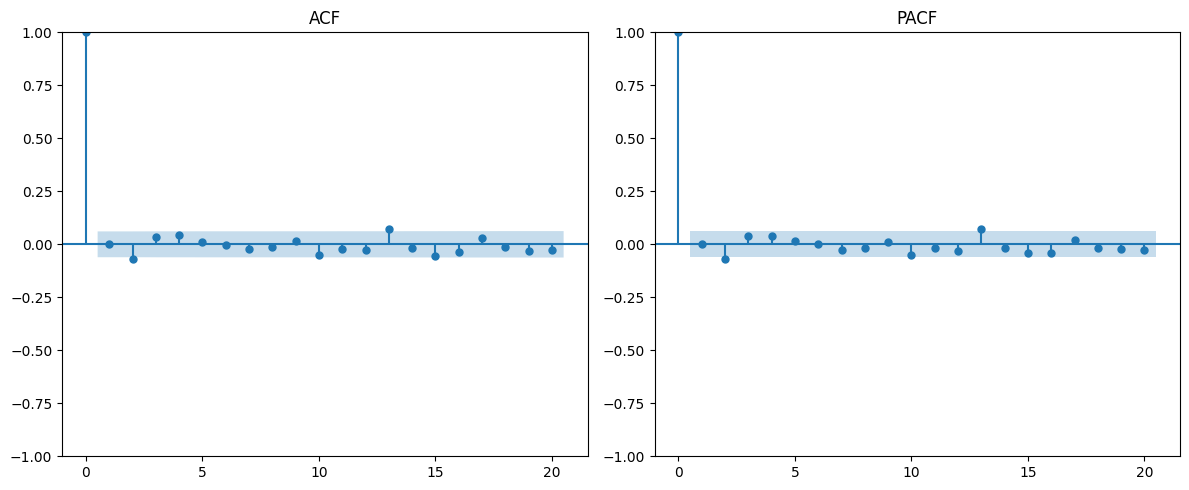

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df['Change %'], ax=axes[0], lags=20)
plot_pacf(df['Change %'], ax=axes[1], lags=20)
axes[0].set_title('ACF')
axes[1].set_title('PACF')
plt.tight_layout()
plt.show()

In [14]:
split_index = int(0.8 * len(df))  # 80% training, 20% testing
train_data = df[:split_index]
test_data = df[split_index:]

observations = df["Change %"].values.reshape(-1,1)
train_observation= train_data["Change %"].values.reshape(-1,1)
test_observation= test_data["Change %"].values.reshape(-1,1)

In [15]:
train_data

,Date,Price,Open,High,Low,Change %,log-return
1033,2021-01-01,1898.10,"1,897.69","1,899.12","1,897.39",0.09,-0.023009
1032,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",2.33,-0.003633
1031,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",0.36,0.015791
1030,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",-1.57,0.003294
1029,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",-0.33,0.034167
...,...,...,...,...,...,...,...
211,2024-02-28,2034.62,"2,030.05","2,038.30","2,024.56",0.25,-0.004228
210,2024-02-29,2043.24,"2,034.92","2,050.79","2,027.75",0.42,-0.019460
209,2024-03-01,2083.39,"2,043.44","2,088.40","2,038.55",1.96,-0.015054
208,2024-03-04,2114.99,"2,082.09","2,119.95","2,079.45",1.52,-0.005921


2102.401398179652
2055.201459657525
2047.1042173302985
2054.475895975594
2044.1791562000274


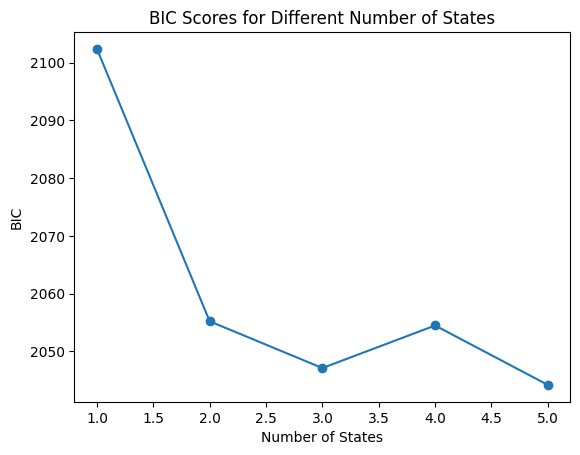

In [16]:
bic_scores = []
for n in range(1, 6):  # Test 1 to 5 states
    model = GaussianHMM(n_components=n, covariance_type='diag', n_iter=1000, random_state=42)
    model.fit(train_observation)
    bic = -2 * model.score(train_observation) + n * np.log(len(train_observation))
    print(bic)
    bic_scores.append(bic)

# Plot BIC scores
plt.plot(range(1, 6), bic_scores, marker='o')
plt.title('BIC Scores for Different Number of States')
plt.xlabel('Number of States')
plt.ylabel('BIC')
plt.show()


In [17]:
n_states=4
hmm_model = GaussianHMM(n_components=n_states, covariance_type='diag', n_iter=1000, random_state=42)
hmm_model.fit(train_observation) 

GaussianHMM(n_components=4, n_iter=1000, random_state=42)

In [18]:
hidden_states = hmm_model.predict(train_observation)
train_data.loc[:, "hidden_states"]=hidden_states 
log_likelihood = hmm_model.score(test_observation)
print("Log-likelihood on testing data:", log_likelihood)

Log-likelihood on testing data: -300.792710352746


/var/folders/n8/rl9hpz_93011h2q9fmy_9_700000gn/T/ipykernel_59608/4108408179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, "hidden_states"]=hidden_states


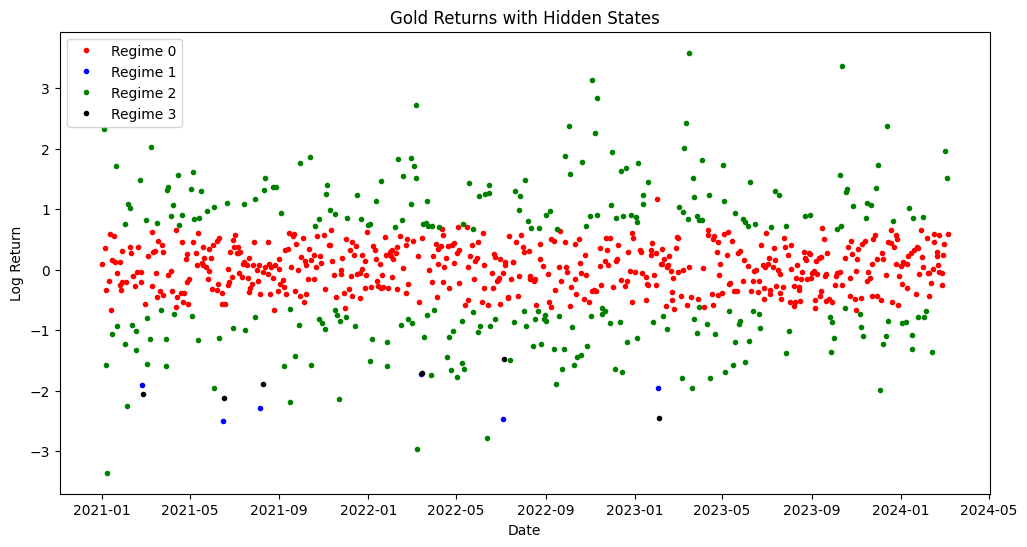

In [19]:
# Plot log-returns with hidden states
plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', "black", "gold"]
for state in range(n_states):
    plt.plot(train_data['Date'][train_data['hidden_states'] == state],
             train_data['Change %'][train_data['hidden_states'] == state],
             '.', label=f'Regime {state}', color=colors[state])
plt.title('Gold Returns with Hidden States')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

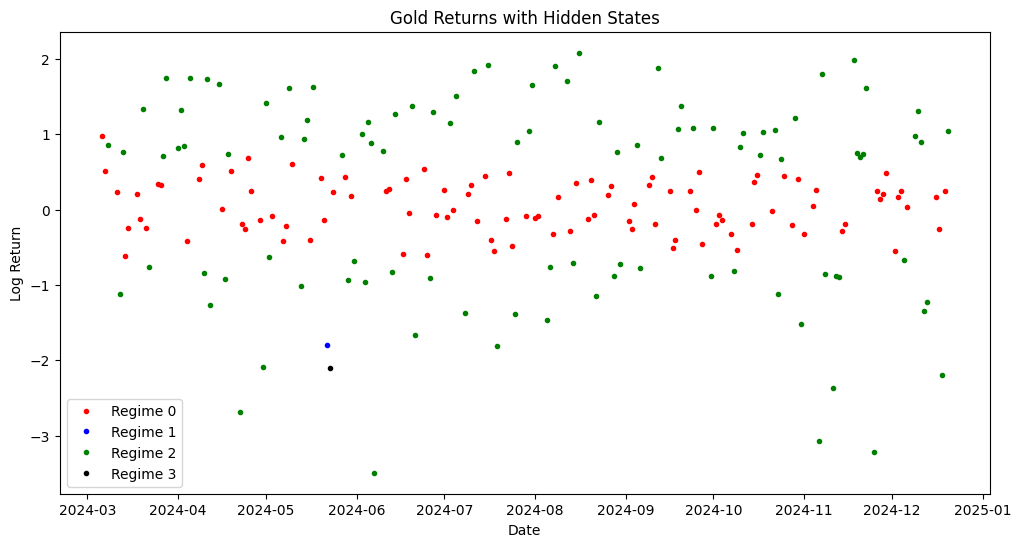

In [25]:
# Plot log-returns with hidden states
hidden_states = hmm_model.predict(test_observation)
test_data.loc[:, "hidden_states"]=hidden_states 

plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', "black", "gold"]
for state in range(n_states):
    plt.plot(test_data['Date'][test_data.loc[:, 'hidden_states'] == state],
             test_data['Change %'][test_data.loc[:, 'hidden_states'] == state],
             '.', label=f'Regime {state}', color=colors[state])
plt.title('Gold Returns with Hidden States')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [26]:
print("Transition Matrix:")
print(hmm_model.transmat_)

print("\nMeans and Covariances of each state:")
for i in range(n_states):
    print(f"State {i}: Mean = {hmm_model.means_[i][0]}, Variance = {hmm_model.covars_[i][0]}")


Transition Matrix:
[[4.90765758e-001 1.20014456e-002 4.97108125e-001 1.24671459e-004]
 [1.53586477e-007 1.45878239e-088 8.92339333e-005 9.99910612e-001]
 [4.77221661e-001 1.06136970e-003 5.21715661e-001 1.30811046e-006]
 [9.99999992e-001 5.67162071e-148 8.46141037e-009 1.97015284e-058]]

Means and Covariances of each state:
State 0: Mean = 0.02763650068127874, Variance = [0.22466827]
State 1: Mean = -2.15388618303139, Variance = [0.09248604]
State 2: Mean = 0.06023837385227732, Variance = [1.1391996]
State 3: Mean = -1.9405247899425202, Variance = [0.1052144]


# Regime Characteristics Table

| **Regime** | **Characteristics**                        | **Volatility** | **Return Range**   | **Interpretation**                       |
|------------|--------------------------------------------|----------------|--------------------|------------------------------------------|
| **Regime 0 (Red)** | High positive returns with moderate spread | Moderate       | Positive           | Bullish market or growth periods.        |
| **Regime 2 (Green)** | Stable returns centered near zero, minimal spread | Low            | Around zero        | Market stability or periods of consolidation. |
| **Regime 1 (Blue)** | Low returns, mostly negative, tight clustering | Low            | Negative           | Bearish market or declining conditions.  |
| **Regime 3 (Black)** | Extreme negative returns with high spread    | High           | Large negative     | Outliers or rare unusual conditions.     |

In [27]:
df = pd.concat([train_data,test_data])
df

,Date,Price,Open,High,Low,Change %,log-return,hidden_states
1033,2021-01-01,1898.10,"1,897.69","1,899.12","1,897.39",0.09,-0.023009,0
1032,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",2.33,-0.003633,2
1031,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",0.36,0.015791,0
1030,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",-1.57,0.003294,2
1029,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",-0.33,0.034167,0
...,...,...,...,...,...,...,...,...
4,2024-12-16,2652.50,"2,649.11","2,664.83","2,643.34",0.16,0.002627,0
3,2024-12-17,2645.54,"2,652.63","2,659.22","2,633.00",-0.26,0.022133,0
2,2024-12-18,2587.63,"2,645.68","2,652.09","2,586.52",-2.19,-0.002401,2
1,2024-12-19,2593.85,"2,587.87","2,626.73","2,583.49",0.24,-0.010333,0


In [28]:
initial_value = 1000
risk_free_rate =0.03
transaction_cost = 0.004  # 0.1% transaction cost per switch
portfolio_values = [initial_value] 

for i in range(1, len(df.Price)):
    if df["hidden_states"].iloc[i]==0 or df["hidden_states"].iloc[i]==1 or df["hidden_states"].iloc[i]==3:
        allocation = 0 # high risk 
        portfolio_value = portfolio_values[-1]*(1+risk_free_rate/252)
    
    elif df["hidden_states"].iloc[i]==2:
        if df["Change %"].iloc[i]>0 : 
            allocation = 0 # negative return
            portfolio_value = portfolio_values[-1]*(1+df["Change %"].iloc[i]/100)
        elif df["Change %"].iloc[i]< 0:
            portfolio_value = portfolio_values[-1]*(1+risk_free_rate/252)

    if df["hidden_states"].iloc[i-1] in [0,1,3] and df["hidden_states"].iloc[i]==2 or df["hidden_states"].iloc[i-1]==2 and df["hidden_states"].iloc[i] in [0,1,3]:
        portfolio_value-= portfolio_values[-1]* transaction_cost

    portfolio_values.append(portfolio_value)
    
df["portfolio_values"] = portfolio_values

## Interpretation of the Strategy

- In high-risk states $(0,1,3)$, the portfolio avoids the market entirely, earning the risk-free rate.
- In state 2, the portfolio participates in the market, but only during positive returns (Change \% > 0 ).
- Negative returns in state 2 trigger a shift back to cash.

##### Transaction Costs:
- Frequent hidden state changes can erode the portfolio's performance due to transaction costs.
- Overall Objective:

This strategy appears defensive, prioritizing capital preservation in risky conditions while attempting to capture gains in favorable market conditions.

In [29]:
df["Buy_hold_strategy"] = initial_value*(df["Price"]/df["Price"].iloc[0])

In [30]:
df

,Date,Price,Open,High,Low,Change %,log-return,hidden_states,portfolio_values,Buy_hold_strategy
1033,2021-01-01,1898.10,"1,897.69","1,899.12","1,897.39",0.09,-0.023009,0,1000.000000,1000.000000
1032,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",2.33,-0.003633,2,1019.300000,1023.275907
1031,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",0.36,0.015791,0,1015.344145,1027.000685
1030,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",-1.57,0.003294,2,1011.403643,1010.910911
1029,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",-0.33,0.034167,0,1007.478434,1007.586534
...,...,...,...,...,...,...,...,...,...,...
4,2024-12-16,2652.50,"2,649.11","2,664.83","2,643.34",0.16,0.002627,0,2249.406630,1397.450082
3,2024-12-17,2645.54,"2,652.63","2,659.22","2,633.00",-0.26,0.022133,0,2249.674416,1393.783257
2,2024-12-18,2587.63,"2,645.68","2,652.09","2,586.52",-2.19,-0.002401,2,2240.943537,1363.273800
1,2024-12-19,2593.85,"2,587.87","2,626.73","2,583.49",0.24,-0.010333,0,2232.246542,1366.550761


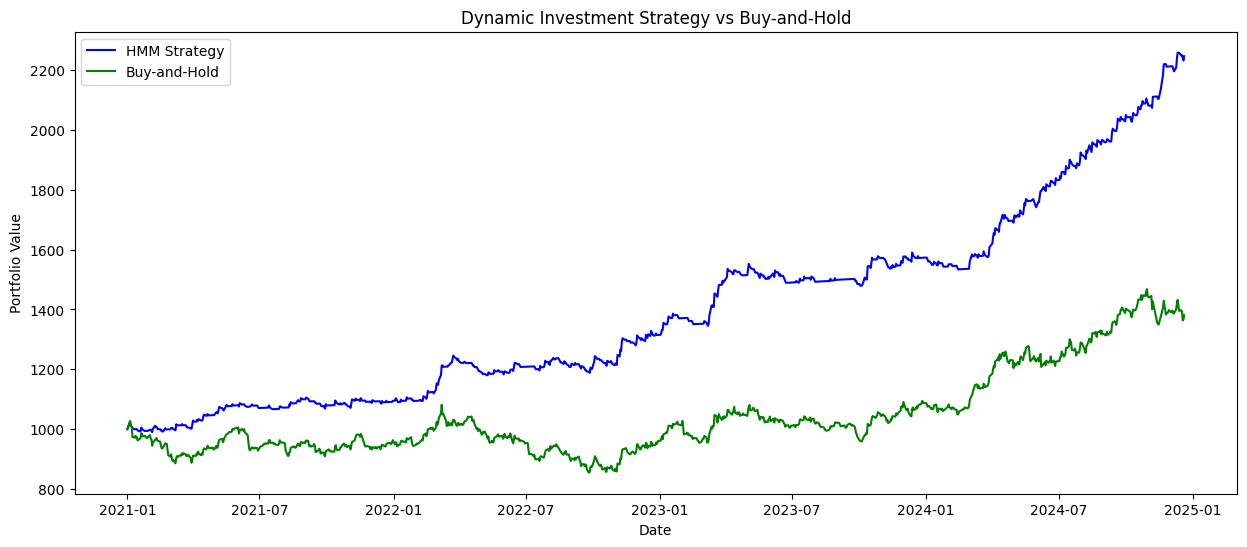

In [31]:
# Step 4: Plot Results
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['portfolio_values'], label='HMM Strategy', color='blue')
plt.plot(df['Date'], df['Buy_hold_strategy'], label='Buy-and-Hold', color='green')
plt.title("Dynamic Investment Strategy vs Buy-and-Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

In [32]:
strategy_returns  = np.log(df["portfolio_values"]).diff().dropna()
buy_hold_returns= np.log(df["Buy_hold_strategy"]).diff().dropna()
# Step 5: Calculate Sharpe Ratios
strategy_sharpe = strategy_returns.mean() / strategy_returns.std() * np.sqrt(252)
buy_hold_sharpe = buy_hold_returns.mean() / buy_hold_returns.std() * np.sqrt(252)

print(f"Sharpe Ratio (HMM Strategy): {strategy_sharpe:.2f}")
print(f"Sharpe Ratio (Buy-and-Hold): {buy_hold_sharpe:.2f}")

Sharpe Ratio (HMM Strategy): 2.26
Sharpe Ratio (Buy-and-Hold): 0.56


In [33]:
import numpy as np

# Calculate daily returns
strategy_returns = np.log(df["portfolio_values"]).diff().dropna()
buy_hold_returns = np.log(df["Buy_hold_strategy"]).diff().dropna()

# Function to calculate performance metrics
def performance_metrics(returns):
    metrics = {}
    trading_days = 252  # Annualize factors

    # Sharpe Ratio
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(trading_days)
    metrics["Sharpe Ratio"] = sharpe_ratio

    # Sortino Ratio
    downside_returns = returns[returns < 0]
    sortino_ratio = returns.mean() / downside_returns.std() * np.sqrt(trading_days) if len(downside_returns) > 0 else np.nan
    metrics["Sortino Ratio"] = sortino_ratio

    # Maximum Drawdown
    cumulative_returns = (1 + returns).cumprod()
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()
    metrics["Max Drawdown"] = max_drawdown

    # Annualized Return
    annualized_return = ((1 + returns.mean()) ** trading_days) - 1
    metrics["Annualized Return"] = annualized_return

    # Annualized Volatility
    annualized_volatility = returns.std() * np.sqrt(trading_days)
    metrics["Annualized Volatility"] = annualized_volatility

    # Calmar Ratio
    calmar_ratio = annualized_return / abs(max_drawdown) if abs(max_drawdown) > 0 else np.nan
    metrics["Calmar Ratio"] = calmar_ratio

    return metrics

# Calculate metrics for HMM Strategy
strategy_metrics = performance_metrics(strategy_returns)
# Calculate metrics for Buy-and-Hold Strategy
buy_hold_metrics = performance_metrics(buy_hold_returns)

# Print metrics
print("Performance Metrics (HMM Strategy):")
for metric, value in strategy_metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nPerformance Metrics (Buy-and-Hold):")
for metric, value in buy_hold_metrics.items():
    print(f"{metric}: {value:.2f}")


Performance Metrics (HMM Strategy):
Sharpe Ratio: 2.26
Sortino Ratio: 29092361162123.90
Max Drawdown: -0.05
Annualized Return: 0.22
Annualized Volatility: 0.09
Calmar Ratio: 4.12

Performance Metrics (Buy-and-Hold):
Sharpe Ratio: 0.56
Sortino Ratio: 0.80
Max Drawdown: -0.21
Annualized Return: 0.08
Annualized Volatility: 0.14
Calmar Ratio: 0.38


## Source

### RSI 14 trading strategies

1033     0.00
1032     0.00
1031     0.00
1030    -1.57
1029    -1.90
        ...  
4      -15.27
3      -15.27
2      -15.27
1      -15.27
0      -15.27
Name: Strategy_Return, Length: 1034, dtype: float64

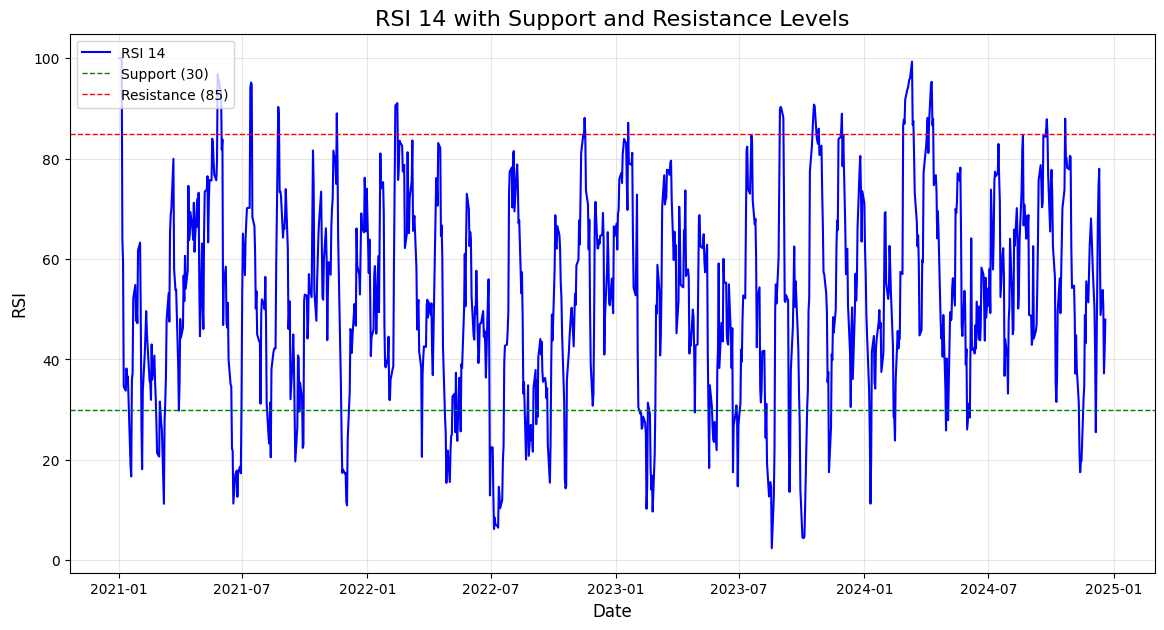

In [66]:
# Calculate gains and losses
df['Gain'] = np.where(df['Change %'] > 0, df['Change %'], 0)
df['Loss'] = np.where(df['Change %'] < 0, -df['Change %'], 0)
# Calculate average gain and loss (14-period)
window = 10
df['Avg_Gain'] = df['Gain'].rolling(window=window, min_periods=1).mean()
df['Avg_Loss'] = df['Loss'].rolling(window=window, min_periods=1).mean()

# Calculate RSI
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['RSI'], label='RSI 14', color='blue', linewidth=1.5)

# Add support and resistance levels
plt.axhline(y=30, color='green', linestyle='--', linewidth=1, label='Support (30)')
plt.axhline(y=85, color='red', linestyle='--', linewidth=1, label='Resistance (85)')

# Add title and labels
plt.title('RSI 14 with Support and Resistance Levels', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI', fontsize=12)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Add grid for better readability
plt.grid(alpha=0.3)
df['Signal'] = np.where(df['RSI'] < 20, 'Buy', np.where(df['RSI'] > 90, 'Sell', 'Hold')) 
df['Position'] = 0  # 1 for holding a long position, 0 for no position
for i in range(1, len(df)):
    if df.loc[i, 'Signal'] == 'Buy' and df.loc[i - 1, 'Position'] == 0:
        df.loc[i, 'Position'] = 1  # Enter long position
    elif df.loc[i, 'Signal'] == 'Sell' and df.loc[i - 1, 'Position'] == 1:
        df.loc[i, 'Position'] = 0  # Exit long position
    else:
        df.loc[i, 'Position'] = df.loc[i - 1, 'Position']  # Hold the current position

df['Strategy_Return'] = df['Change %'] * df['Position']
df['Strategy_Return'].cumsum()

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate RSI
def calculate_rsi(df, window=14):
    df['Gain'] = np.where(df['Change %'] > 0, df['Change %'], 0)
    df['Loss'] = np.where(df['Change %'] < 0, -df['Change %'], 0)

    df['Avg_Gain'] = df['Gain'].rolling(window=window).mean()
    df['Avg_Loss'] = df['Loss'].rolling(window=window).mean()

    df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    return df

# Define the strategy
def rsi_strategy(df, rsi_low=30, rsi_high=70):
    # Signals based on RSI thresholds
    df['Signal'] = np.where(df['RSI'] < rsi_low, 'Buy', np.where(df['RSI'] > rsi_high, 'Sell', 'Hold'))

    # Generate positions
    df['Position'] = 0
    df.loc[df['Signal'] == 'Buy', 'Position'] = 1
    df.loc[df['Signal'] == 'Sell', 'Position'] = -1

    # Carry forward positions
    df['Position'] = df['Position'].replace(to_replace=0, method='ffill')

    # Calculate strategy returns
    df['Strategy_Return'] = df['Change %'] * df['Position'].shift(1)
    df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()
    df['Cumulative_Market_Return'] = (1 + df['Change %']).cumprod()
    return df


/var/folders/n8/rl9hpz_93011h2q9fmy_9_700000gn/T/ipykernel_897/2369662835.py:28: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Position'].replace(to_replace=0, method='ffill')


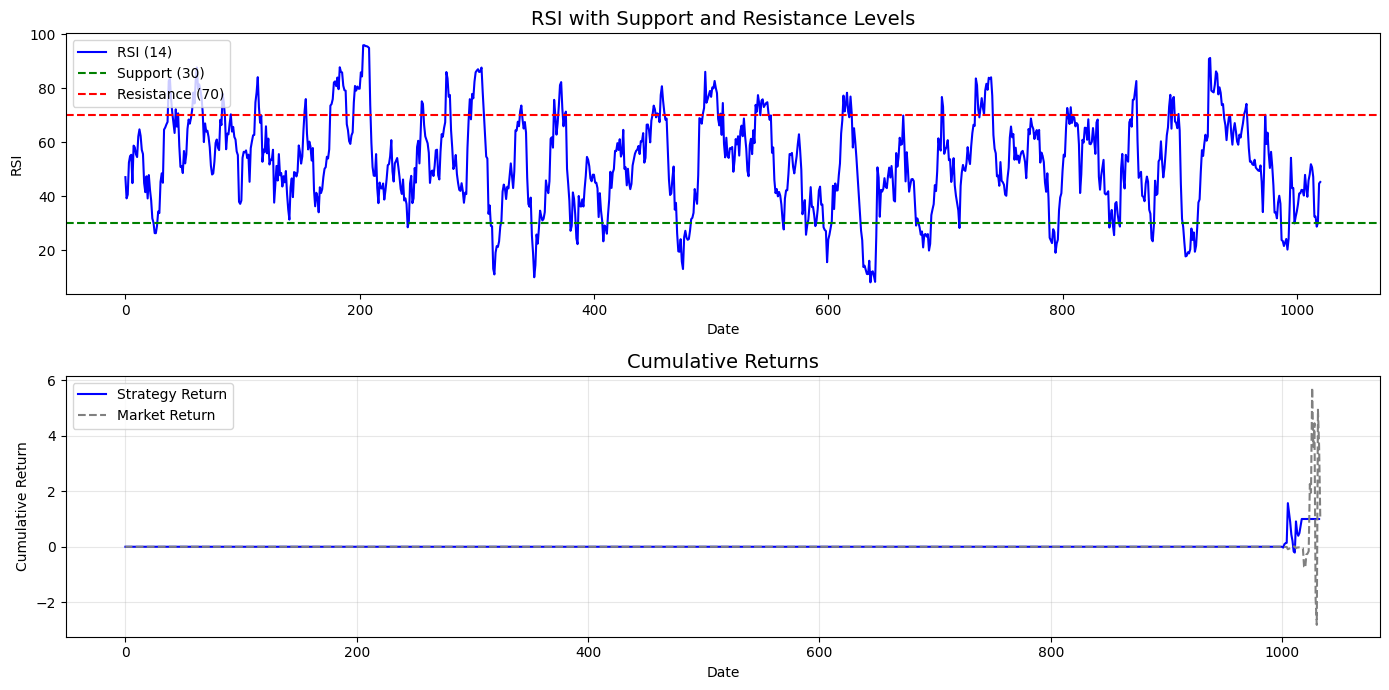

In [68]:
# Calculate RSI and apply the strategy
df = calculate_rsi(df)
df = rsi_strategy(df)

# Plot RSI and strategy returns
plt.figure(figsize=(14, 7))

# RSI plot
plt.subplot(2, 1, 1)
plt.plot(df.index, df['RSI'], label='RSI (14)', color='blue', linewidth=1.5)
plt.axhline(30, color='green', linestyle='--', label='Support (30)')
plt.axhline(70, color='red', linestyle='--', label='Resistance (70)')
plt.title('RSI with Support and Resistance Levels', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='upper left')

# Strategy performance plot
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Cumulative_Strategy_Return'], label='Strategy Return', color='blue', linewidth=1.5)
plt.plot(df.index, df['Cumulative_Market_Return'], label='Market Return', color='gray', linestyle='--', linewidth=1.5)
plt.title('Cumulative Returns', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')

plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()


In [69]:
from itertools import product

def optimize_rsi(df, windows, rsi_lows, rsi_highs):
    """
    Perform grid search to optimize RSI parameters.
    :param df: DataFrame with price data.
    :param windows: List of RSI window sizes to test.
    :param rsi_lows: List of RSI lower thresholds to test.
    :param rsi_highs: List of RSI upper thresholds to test.
    :return: DataFrame with optimization results.
    """
    results = []

    for window, rsi_low, rsi_high in product(windows, rsi_lows, rsi_highs):
        # Calculate RSI
        temp_df = calculate_rsi(df.copy(), window=window)
        
        # Apply strategy
        temp_df = rsi_strategy(temp_df, rsi_low=rsi_low, rsi_high=rsi_high)
        
        # Calculate performance metrics
        total_return = temp_df['Cumulative_Strategy_Return'].iloc[-1] - 1
        sharpe_ratio = (temp_df['Strategy_Return'].mean() / temp_df['Strategy_Return'].std()) * np.sqrt(252)  # Assuming daily returns

        # Store the results
        results.append({
            'Window': window,
            'RSI_Low': rsi_low,
            'RSI_High': rsi_high,
            'Total_Return': total_return,
            'Sharpe_Ratio': sharpe_ratio
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df.sort_values(by='Sharpe_Ratio', ascending=False)


/var/folders/n8/rl9hpz_93011h2q9fmy_9_700000gn/T/ipykernel_897/2369662835.py:28: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Position'].replace(to_replace=0, method='ffill')
/var/folders/n8/rl9hpz_93011h2q9fmy_9_700000gn/T/ipykernel_897/2369662835.py:28: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Position'].replace(to_replace=0, method='ffill')


Best Parameters:
    Window  RSI_Low  RSI_High  Total_Return  Sharpe_Ratio
26      20       35        80          -1.0      0.686940
8       10       35        80          -1.0      0.685458
24      20       35        70          -1.0      0.621980
7       10       35        75          -1.0      0.535696
23      20       30        80          -1.0      0.519831


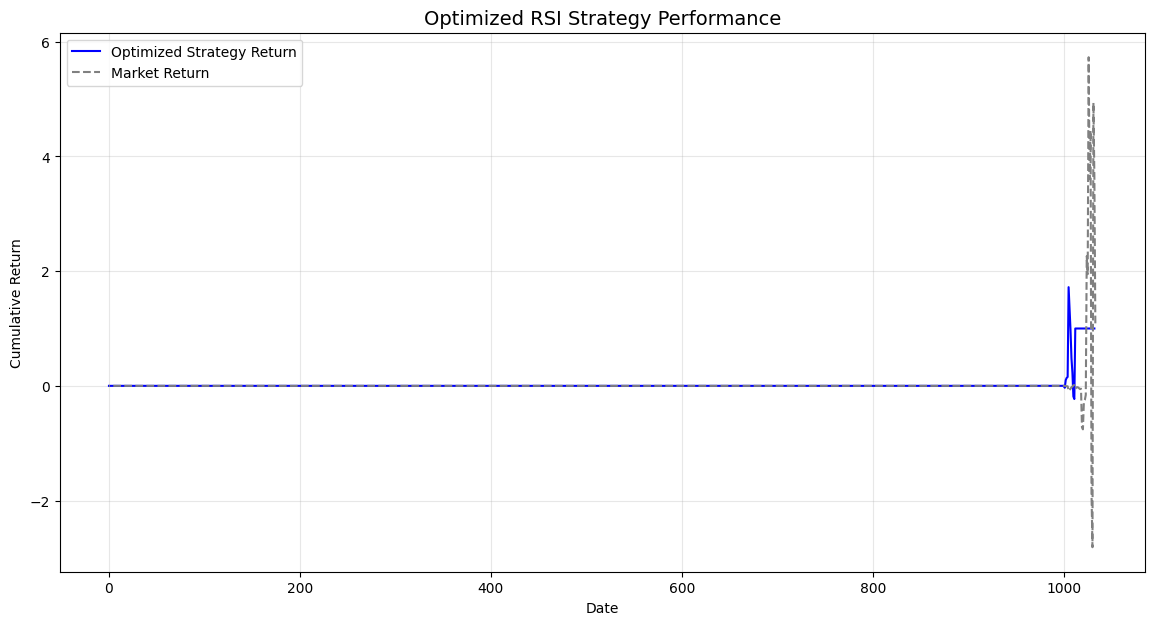

In [70]:
# Define parameter ranges for optimization
windows = [10, 14, 20]
rsi_lows = [25, 30, 35]
rsi_highs = [70, 75, 80]

# Optimize the strategy
optimization_results = optimize_rsi(df, windows, rsi_lows, rsi_highs)

# Display the best parameters
print("Best Parameters:")
print(optimization_results.head())

# Plot the optimized strategy performance
best_params = optimization_results.iloc[0]
optimized_df = calculate_rsi(df, window=int(best_params['Window']))
optimized_df = rsi_strategy(optimized_df, rsi_low=int(best_params['RSI_Low']), rsi_high=int(best_params['RSI_High']))

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(optimized_df.index, optimized_df['Cumulative_Strategy_Return'], label='Optimized Strategy Return', color='blue')
plt.plot(optimized_df.index, optimized_df['Cumulative_Market_Return'], label='Market Return', color='gray', linestyle='--')
plt.title('Optimized RSI Strategy Performance', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()


In [71]:
optimization_results

,Window,RSI_Low,RSI_High,Total_Return,Sharpe_Ratio
26,20,35,80,-1.0,0.686940
8,10,35,80,-1.0,0.685458
24,20,35,70,-1.0,0.621980
7,10,35,75,-1.0,0.535696
23,20,30,80,-1.0,0.519831
16,14,35,75,-1.0,0.477672
21,20,30,70,-1.0,0.399080
11,14,25,80,-1.0,0.383094
17,14,35,80,-1.0,0.379553
14,14,30,80,-1.0,0.345751
